# Explore kernels

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [33]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, x])

In [34]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, x1])


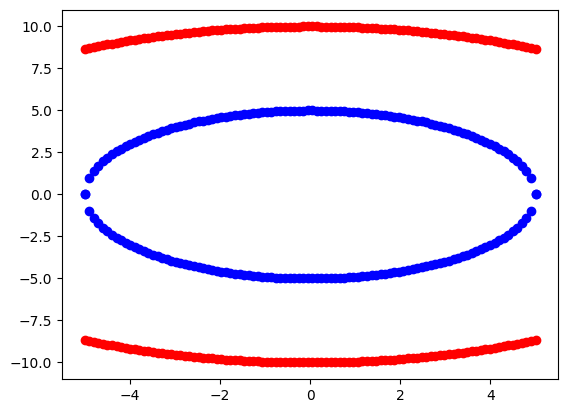

In [35]:
plt.scatter(x, y, color='r')
plt.scatter(x1, y1, color='b')
plt.show()

here datapoints are overlap and we cant create linear line on this
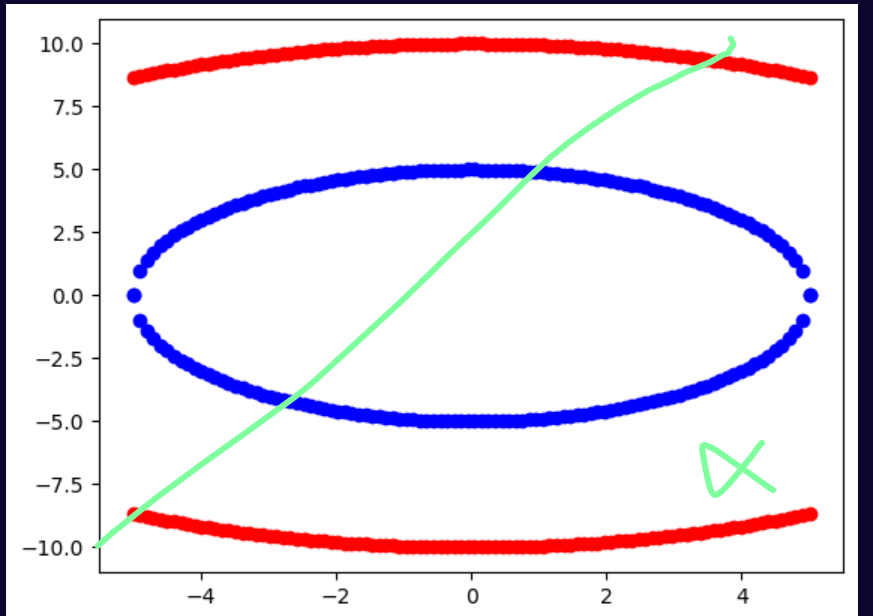

In [36]:
df1 = pd.DataFrame(np.vstack([x,y]).T, columns=['X1', 'X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([x1,y1]).T, columns=['X1', 'X2'])
df2['Y'] = 1

df = pd.concat([df1, df2], ignore_index=True)
df.head(), df.tail()

(        X1        X2  Y
 0 -5.00000  8.660254  0
 1 -4.89899  8.717792  0
 2 -4.79798  8.773790  0
 3 -4.69697  8.828277  0
 4 -4.59596  8.881281  0,
           X1        X2  Y
 395  4.59596 -1.969049  1
 396  4.69697 -1.714198  1
 397  4.79798 -1.406908  1
 398  4.89899 -0.999949  1
 399  5.00000 -0.000000  1)

In [37]:
#dependent and indepencdent


X = df[['X1', 'X2']]
y = df['Y']

In [38]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

3      0
18     0
202    1
250    1
274    1
      ..
71     0
106    0
270    1
348    1
102    0
Name: Y, Length: 320, dtype: int64

Apply differnt Dernels
1. Linear Kernal
2. Polynomial Kernel
3. RGF
4. Sigmoid

#### Linear KErnal

In [39]:
#Polynomial Features
#componenets

df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = df['X1'] * df['X2']
df.head()


,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,-5.00000,8.660254,0,25.000000,75.000000,-43.301270
1,-4.89899,8.717792,0,24.000102,75.999898,-42.708375
2,-4.79798,8.773790,0,23.020610,76.979390,-42.096467
3,-4.69697,8.828277,0,22.061524,77.938476,-41.466150
4,-4.59596,8.881281,0,21.122845,78.877155,-40.818009


In [40]:
#dependent and indepencdent
X = df[['X1', 'X2', 'X1_Square', 'X2_Square', 'X1*X2']]
y = df['Y']

In [41]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color='Y')
fig.show()

In [43]:
#take 3 features
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2', color='Y')
fig.show()

In [44]:
#perofm svm
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [45]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



#### 2. Polynomial 

Polynomial kernal will automatically create the x1square and x2 square so we can directly predict

In [46]:


model_poly = SVC(kernel='poly')
model_poly.fit(X_train, y_train)
y_pred = model_poly.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [47]:

def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM with Polynomial Kernel')
    plt.show()

plot_decision_boundary(X, y, model_poly)

InvalidIndexError: (slice(None, None, None), 0)